#Getting dataset from huggingface

In [5]:
 # install datasets
!pip install -q datasets

#listing the datasets

In [6]:
# Let's import the library. We typically only need at most two methods:
from datasets import list_datasets, load_dataset
from pprint import pprint

# Currently available datasets
datasets = list_datasets()

<ipython-input-6-65f7393e9ef0>:6: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# Loading allocine

In [7]:
# Downloading and loading a dataset
dataset = load_dataset('allocine')
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['review', 'label'],
        num_rows: 160000
    })
    validation: Dataset({
        features: ['review', 'label'],
        num_rows: 20000
    })
    test: Dataset({
        features: ['review', 'label'],
        num_rows: 20000
    })
})


# allocine Columns

In [8]:
# You can inspect the dataset column names and types
print("Column names:")
pprint(dataset.column_names)

Column names:
{'test': ['review', 'label'],
 'train': ['review', 'label'],
 'validation': ['review', 'label']}


# covert the hugging face dataset object to pandas pd

In [9]:
train_df = dataset['train'].to_pandas()
valid_df = dataset['validation'].to_pandas()
test_df = dataset['test'].to_pandas()

# Check for nulls

In [10]:
train_df.describe()
print('checking nulls in train set: ', train_df.isnull().sum())
print()
print('checking nulls in valid set: ', valid_df.isnull().sum())

checking nulls in train set:  review    0
label     0
dtype: int64

checking nulls in valid set:  review    0
label     0
dtype: int64


# Number of samples in the valid and train sets

In [11]:
# sentiments counts
print('train set counts : ', train_df["label"].value_counts())
print('valid set counts : ',valid_df["label"].value_counts())

train set counts :  label
1    80587
0    79413
Name: count, dtype: int64
valid set counts :  label
0    10204
1     9796
Name: count, dtype: int64


# Dealing with Emojies in reviews
* we chosed to review rows with emojies  

In [12]:
import pandas as pd

# Using emoji unicode range to filter rows containing emojis (emojis encoding)
emoji_range = r'[\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U00002639\U0000263A\U00002648-\U0000264B\U00002650-\U00002653\U00002660\U00002663\U00002665\U00002666\U00002668\U0000267B\U0000267F\U0000269B\U0000269C]'

# Select only the rows that contain emojies
rows_with_emoji = train_df[train_df["review"].str.contains(emoji_range, regex=True)]

# Getting random row from the filtered DataFrame
one_row_with_emoji = rows_with_emoji.sample(n=3)

print(one_row_with_emoji)


                                                   review  label
137377  Note d'amour pour ce film qui a bercé mon enfa...      1
119527  Jadore Marie ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤je me rappell...      1
30719   Ce film est génial ! En ce moment, je le regar...      1


Checking the chars in our train df

In [13]:
import numpy as np

def special_chars(df):
  # Extract all non-alphabetic characters and store them in a set
  non_alphab_chars = np.unique([char for review in df['review'] for char in review if not char.isalpha()])
  print(non_alphab_chars)

In [14]:
from nltk.corpus import stopwords
from numpy import array
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Emojies Translation we are using this lib link for details [emoji](https://pypi.org/project/emoji/)

In [15]:
# !pip install -q emoji
import emoji

# Chekcing the lib function on random row
  Calling demojize function on review  

In [16]:
one_row_with_emoji['review'] = one_row_with_emoji['review'].apply(lambda x: ' '.join(emoji.demojize(x, language='fr').split()))
one_row_with_emoji

,review,label
137377,Note d'amour pour ce film qui a bercé mon enfa...,1
119527,Jadore Marie :cœur_rouge::cœur_rouge::cœur_rou...,1
30719,"Ce film est génial ! En ce moment, je le regar...",1


 * 7087   "🎬🎥 LEPRECHAUN 4 _ [1996] 🎥🎬 _Appréciation "

is transformed to

* 7087	  ":clap::caméra: LEPRECHAUN 4 _ [1996] :caméra::...	0 "

# Applying the demojize function on all the rows in the train pd

In [17]:
# Apply emoji.demojize() to each row in the 'review' column
train_df['review'] = train_df['review'].apply(lambda x: ' '.join(emoji.demojize(x, language='fr').split()))
# train_df

In [18]:
special_chars(train_df)

[' ' '!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1'
 '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' '[' '\\' ']'
 '^' '_' '`' '{' '|' '}' '~' '\x80' '\x8c' '\x91' '\x93' '\x94' '\x96'
 '\x97' '\x9c' '¡' '£' '¤' '¥' '¦' '§' '¨' '«' '¬' '\xad' '¯' '°' '±' '²'
 '³' '´' '·' '»' '½' '¾' '¿' '×' '̀' '́' '̈' '̧' '͜' '͡' '\u200b' '\u200e'
 '–' '—' '‘' '’' '‚' '“' '”' '•' '…' '\u202a' '\u202c' '′' '″' '€' '→' '∅'
 '∙' '►' '◄' '★' '☆' '♡' '♫' '《' '》' '【' '】' '\ue045' '\ue046' '\uf04c'
 '\uf0ab' '\uf0e0' '\uf8ff' '\ufeff' '�']


# Getting X_set and y_set from train_df, valid_df, test_df

In [19]:
def get_y_X_sets(df_set):
  y_train = train_df['label']
  X_train = train_df.drop(['label'],axis = 1)
  return X_train, y_train

X_train, y_train = get_y_X_sets(train_df)
X_valid, y_valid = get_y_X_sets(valid_df)
X_test, y_test = get_y_X_sets(test_df)

# Preprocessing method
  * takes giving string (review) applies preprocessing operation using the regular expression matching Reuls  

In [20]:
def preprocess_text(sentence: str) -> str:

    sentence = sentence.lower()

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    # Remove Sepecail chars
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = re.sub(r"[^a-zA-Z\s]", ' ', sentence)

    return sentence

In [21]:
X_train = X_train["review"].apply(preprocess_text).tolist()
X_valid = X_valid["review"].apply(preprocess_text).tolist()
X_test =  X_test["review"].apply(preprocess_text).tolist()

In [22]:
X_train[0]

'si vous cherchez du cin abrutissant tous les tages ayant aucune peur du clich en castagnettes et moralement douteux paris love est fait pour vous toutes les productions besson via sa fili europacorp ont de quoi faire na tre la moquerie paris est encore une fois montr comme une capitale exotique mais attention si se dirige vers la banlieue trouve tout plein int gristes musulmans pr ts faire sauter le caisson une ambassadrice ricaine naus eux alors se dit qu va au moins pouvoir appr cier la connade un classique buddy movie avec le jeune agent aux dents longues oblig de faire quipe avec un vieux lou compl tement timbr mais un un jonathan rhys meyers fayot au possible et de autre un john travolta en total lire narcissico badass cr ne ras et bouc pro minent appui sinon il aucun sc nario seulement des poursuites biles sur autoroute travolta qui tale mecs arme blanche en mouvements ou laisse son associ se faire molir la tronche pendant qu il scrute la jumelle ca pourrait tre un plaisir coupa

# Using keras tokenizer we tokenized our sets

In [23]:
from keras.preprocessing.text import Tokenizer

# Method fit_on_text trains the tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
word_tokenizer.fit_on_texts(X_valid)
word_tokenizer.fit_on_texts(X_test)

# Method texts_to_sequences converts sentences to their numeric form
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)
X_valid = word_tokenizer.texts_to_sequences(X_valid)

 # Check on the len of the reviews

In [24]:
from collections import Counter

# outlier review stats
review_length = Counter([len(x) for x in X_train])
print("Zero-length reviews: {}".format(review_length[0]))
print("Maximum review length: {}".format(max(review_length)))

Zero-length reviews: 11
Maximum review length: 369


# Adding padding to the small rows so that our reviews  have the same size

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding all reviews to fixed length 100
maxlen = 400
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_valid = pad_sequences(X_valid, padding='post', maxlen=maxlen)

# Encoding the labels

In [26]:
from sklearn.preprocessing import LabelEncoder

# Converting sentiment labels to 0 & 1
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_train = label.fit_transform(y_train)

# LSTM

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
# The length of tokenizer.word_index gives the number of unique words in the vocabulary.
# We add 1 to account for the possibility of a padding token, which is commonly used in sequence models.

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

122713

In [29]:
# Neural Network architecture
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim = vocab_length, output_dim = 128, input_length=maxlen ))
lstm_model.add(LSTM(units=128, return_sequences= False))
lstm_model.add(Dense(1, activation='sigmoid'))

In [30]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train,y_train, validation_data=(X_valid,y_valid), epochs=25, batch_size=128, callbacks=[early_stop])

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)

print("Test accuracy:", accuracy)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(128, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 111s 87ms/step - loss: 0.0000e+00 - accuracy: 0.4963 - val_loss: 0.0000e+00 - val_accuracy: 0.4963
Epoch 2/25
1250/1250 [==============================] - 69s 55ms/step - loss: 0.0000e+00 - accuracy: 0.4963 - val_loss: 0.0000e+00 - val_accuracy: 0.4963
Epoch 3/25
1250/1250 [==============================] - 62s 49ms/step - loss: 0.0000e+00 - accuracy: 0.4963 - val_loss: 0.0000e+00 - val_accuracy: 0.4963
Epoch 4/25
1250/1250 [==============================] - 60s 48ms/step - loss: 0.0000e+00 - accuracy: 0.4963 - val_loss: 0.0000e+00 - val_accuracy: 0.4963
Epoch 5/25
1250/1250 [==============================] - 49s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4963 - val_loss: 0.0000e+00 - val_accuracy: 0.4963
Epoch 6/25
1250/1250 [==============================] - 49s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4963 - val_loss: 0.0000e+00 - val_accuracy: 0.4963
Epoch 7/25
1250/1250 [==============================] - 48s 38ms/step - loss: 0.0000e+

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


5000/5000 [==============================] - 39s 8ms/step - loss: 0.0000e+00 - accuracy: 0.4963
Test accuracy: 0.49633124470710754


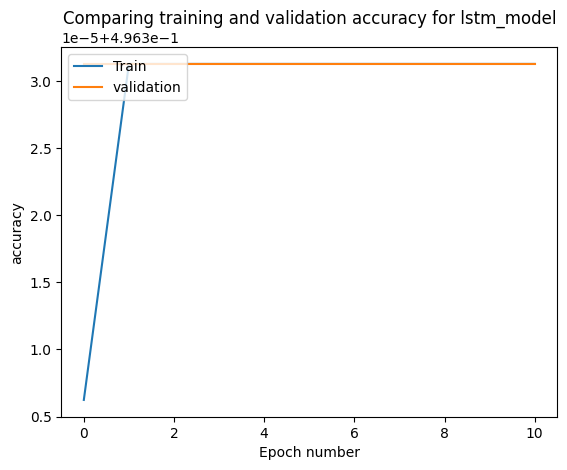

In [31]:
import matplotlib.pyplot as plt
def model_performance(model_name, history, metric_name):
    plt.plot(history.history[metric_name])
    plt.plot(history.history['val_' + metric_name])
    plt.xlabel('Epoch number')
    plt.ylabel(metric_name)
    plt.title('Comparing training and validation ' + metric_name + ' for ' + model_name)
    plt.legend(['Train','validation'], loc='upper left')
    plt.show()

model_performance("lstm_model", history, "accuracy")

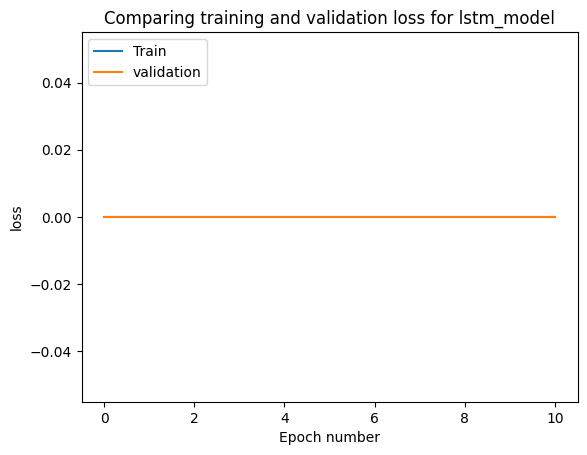

In [32]:
model_performance("lstm_model", history, "loss")